# Функции для 1 и 2

In [1]:
from PIL import Image
import PIL
import numpy as np
import base64

def rgb2gray(rgb):
    if type(rgb)==np.ndarray: # Этот if пригодится для задания 3
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        return np.dot(np.array(Image.open(rgb))[...,:3], [0.299, 0.587, 0.114])

def resize(pic, scale):
    im = Image.open(pic)
    size = tuple((np.array(im.size) * scale).astype(int))
    new_image = np.array(im.resize(size, PIL.Image.BICUBIC))
    return new_image

# 1

In [2]:
rgb2gray('colored_tiger.jpg')[500, 345]

30.198

# 2

In [3]:
resize('colored_tiger.jpg', 0.05)[44,23,1] 

20

# 3. SVD

In [2]:
grey_tiger = rgb2gray(resize('colored_tiger.jpg', 0.5))

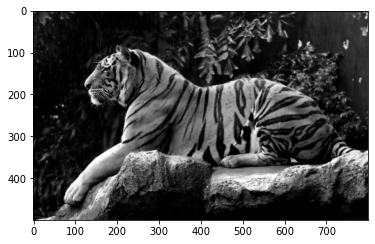

In [3]:
import matplotlib.pyplot as plt
plt.imshow(grey_tiger, cmap='gray')

In [5]:
U, s, V = np.linalg.svd(grey_tiger, full_matrices=False)

In [6]:
lst = []
for i in range(1,501):
    f = np.matrix(U[:, :i]) * np.diag(s[:i]) * np.matrix(V[:i, :])
    lst.append(np.linalg.norm(grey_tiger - f))

In [10]:
grey_tiger.shape

(500, 800)

In [14]:
(500*800)/((500+800)*50)

6.153846153846154

In [12]:
(500+800)*50

65000

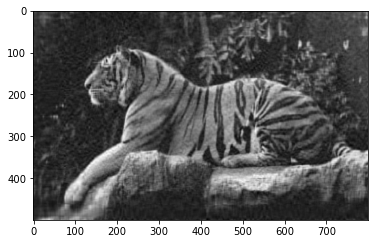

In [9]:
i = 50
plt.imshow(np.matrix(U[:, :i]) * np.diag(s[:i]) * np.matrix(V[:i, :]), cmap='gray')

## Вот так убывает норма разности

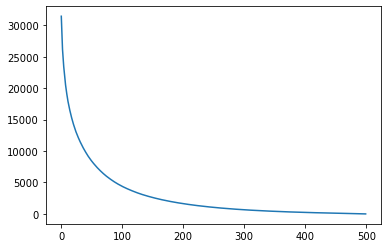

In [7]:
plt.plot(list(range(500)), lst)

# 7 Про NMF и картинку :)

In [ ]:
import warnings 
from sklearn import decomposition
warnings.filterwarnings('ignore')

my_new_im = grey_tiger
lst = []
for i in range(1,60):
    clf = decomposition.NMF(n_components=i, random_state=42, max_iter=1000)
    W1 = clf.fit_transform(my_new_im)
    H1 = clf.components_ 
    lst.append(np.linalg.norm(my_new_im - W1.dot(H1)))
    
plt.plot(list(range(1,60)), lst)

In [10]:
lst[53]

9935.549422593704

Элемент номер 53 дает ответ :) А значит требуется 54 компоненты (нумерация-то с нуля). Ну и давайте глянем, насколько адекватный тигр вышел:

In [11]:
clf = decomposition.NMF(n_components=54, random_state=42, max_iter=1000)
W1 = clf.fit_transform(my_new_im)
H1 = clf.components_

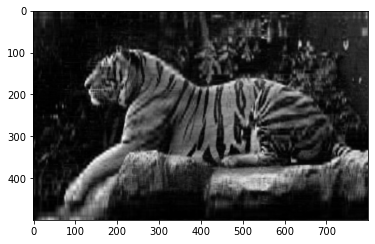

In [12]:
plt.imshow(W1.dot(H1), cmap='gray')

Ну, не знаю как вам, а я умеренно слепой - мне норм.